# Loss function

The __loss function__ is the main theme of modern machine learning; 

> evaluates how well the algorithm models/works for the dataset. 

> If your predictions are totally off, the loss function will output a higher number. 
If they’re pretty good, it’ll output a lower number. 

> As we change pieces of the algorithm to try and improve the model, the loss function will tell us if we’re getting anywhere.

Example
--------

| House       | Actual  Rs | Predicted Rs  | Total Loss |
|-------------|------------|---------------|------------|
| RMZ         | 1000       | 1000          |  0         |
| PMC         | 2000       | 2000          |  0         |
| Purva       | 3000       | 3000          |  0         |
|-------------|------------|---------------|------------|
| RMZ         | 1000       |  500          |  500       |
| PMC         | 2000       | 2000          |  0         |
| Purva       | 3000       | 3000          |  0         |
|-------------|------------|---------------|------------|
| RMZ         | 1000       |  500          |  500       |
| PMC         | 2000       | 1500          |  500       |
| Purva       | 3000       | 4000          |  1000      |

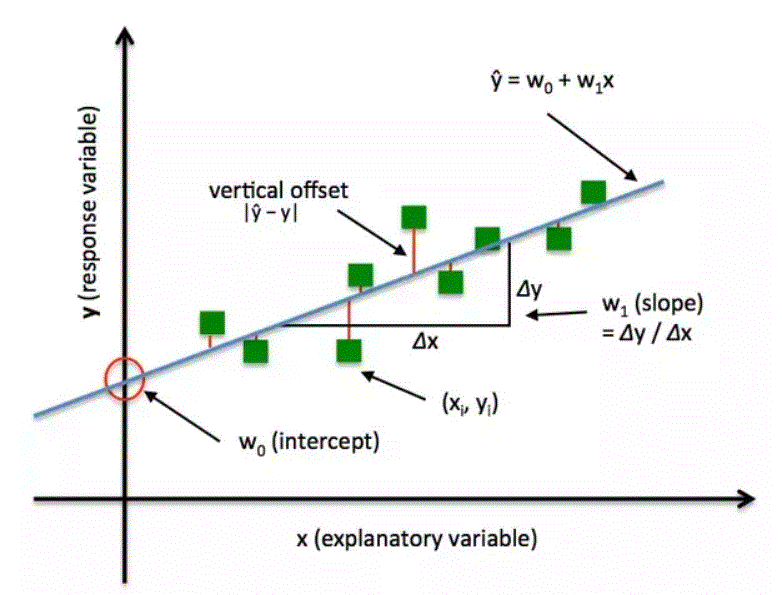

Notice how in the loss function we defined, it doesn’t matter if our predictions were too high or too low. 

All that matters is how incorrect we were, directionally agnostic. 

This is not a feature of all loss functions: in fact, your loss function will vary significantly based on the domain and unique context of the problem that you’re applying machine learning to.

### A lot of the loss functions that we see implemented in machine learning can get complex and confusing. :-( 

# popular loss functions - definitions

Loss functions can be broadly categorized into 2 types: 

    - Classification and 
    - Regression Loss.
    
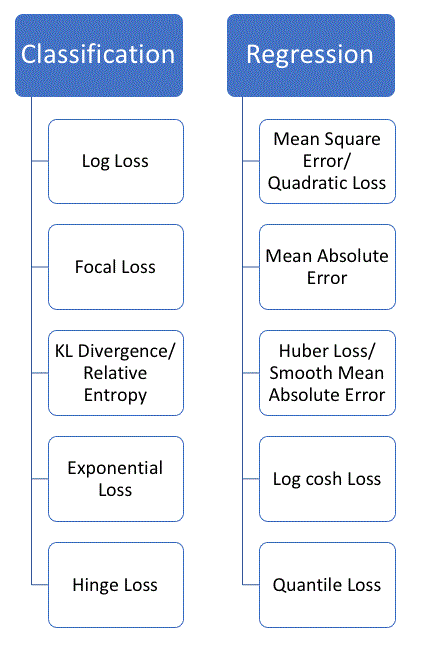

## Regression - L1 loss

- also known as 
    - least absolute deviations (LAD)
    - mean absolute error (MAE)
    - least absolute errors (LAE)

L1 Loss function __minimizes the absolute differences between the estimated values and the existing target values__. So, summing up each target </span> value $y_i$ and corresponding estimated value h($x_i$), where $x_i$ denotes the feature set of a single sample, Sum of absolute differences for ‘n’ samples can be calculated as,

$$ \Large \begin{align*}
  & S = \sum_{i=0}^n|y_i - h(x_i)|
\end{align*} $$

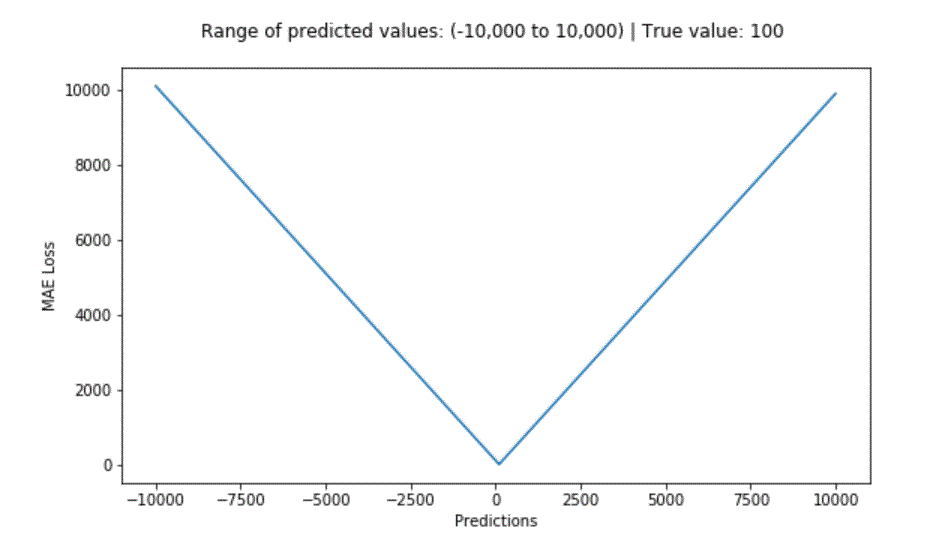

## Regression -  L2 loss

- also known as 
    - Mean Squared Error (MSE)
    - Least square errors(LSE)
    
Mean Squared Error (MSE) is the workhorse of basic loss functions: it’s easy to understand and implement and generally works pretty well. 

To calculate MSE, you take the difference between the predictions and the ground truth, square it, and average it out across the whole dataset.

$$ \Large S = \sum_{i=0}^n (y_i - h(x_i))^2 $$

## Classification - Likelihood Loss
The likelihood function is also relatively simple, and is commonly used in __classification__ problems. The function takes the predicted probability for each input example and multiplies them. 

For example, consider a model that outputs probabilities of 

- [0.4, 0.6, 0.9, 0.1] --> predicted probabilities
- [0,   1,   1,   0]   --> ground truth

The likelihood loss would be computed as 

- (0.6) x (0.6) x (0.9) x (0.9) = 0.2916. 

Since the model outputs probabilities for TRUE (or 1) only, when the ground truth label is 0 we take (1-p) as the probability. 

In other words, we multiply the model’s outputted probabilities together for the actual outcomes.

## Classification - Log Loss (Cross Entropy Loss)
Log Loss is a loss function used frequently in __classification__ problems, and is one of the most popular measures for Kaggle competitions. It’s just a straightforward modification of the likelihood function with logarithms.

This is actually exactly the same formula as the regular likelihood function, but with logarithms added in. 

We can see that when the actual class is 1, the second half of the function disappears, and when the actual class is 0, the first half drops. That way, we just end up multiplying the log of the actual predicted probability for the ground truth class.

The cool thing about the log loss loss function is that is has a kick: it penalizes heavily for being very confident and very wrong.

Predicting high probabilities for the wrong class makes the function go crazy. The graph below is for when the true label =1, and you can see that it skyrockets as the predicted probability for label = 0 approaches 1.

# Detailed explanation ... below

In [1]:
import numpy as np
import pandas as pd

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

## L2 Loss

In [2]:
# function for L2 (MSE)
def MSE(predictions, targets):
    
    mse = []
    for i in np.arange(len(targets)):
        difference         = predictions[i] - targets[i]
        difference_squared = difference ** 2
        
        mse.append(difference_squared)

    return mse

In [3]:
np.arange(-1000, 1000)

array([-1000,  -999,  -998, ...,   997,   998,   999])

In [ ]:
# [100] * len(y_pred)

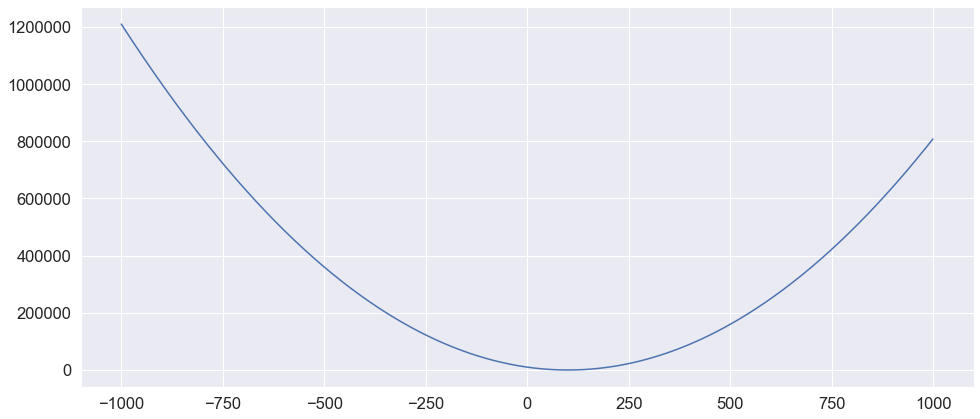

In [4]:
y_pred = np.arange(-1000, 1000)
y_test = [100] * len(y_pred)

mse = MSE(y_pred, y_test)

plt.figure(figsize=(16, 7))
plt.plot(y_pred, mse);

plot of an MSE function where 

    - the true target value is 100, 
    - and the predicted values range between -10,000 to 10,000. 
    
The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.

In [5]:
# MSE loss function
def mse_loss(y_pred, y_true):
    squared_error = (y_pred - y_true) ** 2
    sum_squared_error = np.sum(squared_error)
    loss = sum_squared_error / y_true.size
    return loss

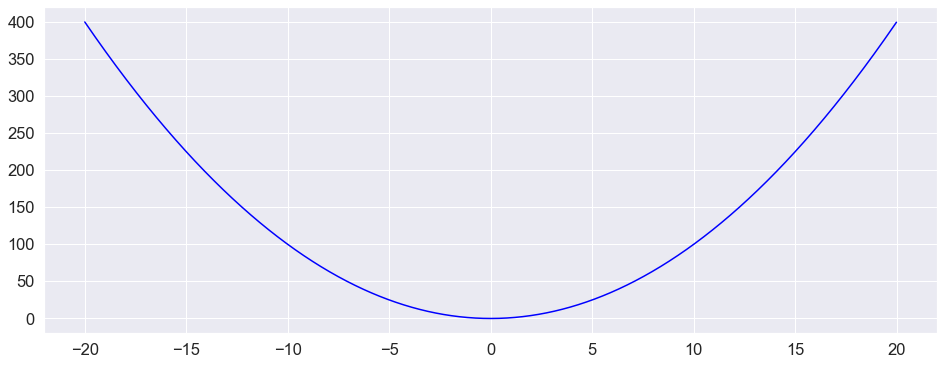

In [6]:
# Plotting
x_vals = np.arange(-20, 20, 0.01)
y_vals = np.square(x_vals)

plt.figure(figsize=(16, 6))

plt.plot(x_vals, y_vals, "blue");
#plt.grid(True, which="major")

## L1 Loss

In [7]:
# function for L1 (MAE)
def MAE(predictions, targets):
    
    mae = []
    for i in range(len(targets)):
        difference         = predictions[i] - targets[i]
        
        mae.append(np.abs(difference))

    return mae

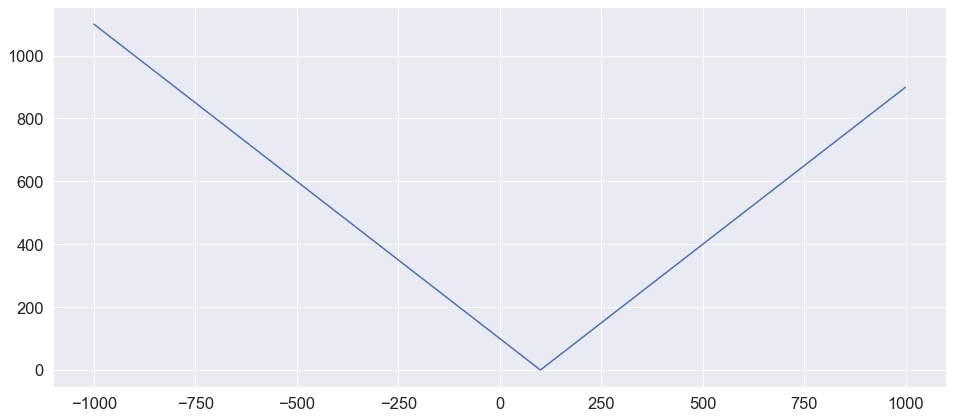

In [8]:
y_pred = np.arange(-1000, 1000)
y_test = [100] * len(y_pred)

mae = MAE(y_pred, y_test)

plt.figure(figsize=(16, 7))
plt.plot(y_pred, mae);

In [9]:
# MAE loss function
def mae_loss(y_pred, y_true):
    abs_error = np.abs(y_pred - y_true)
    sum_abs_error = np.sum(abs_error)
    loss = sum_abs_error / y_true.size
    return loss

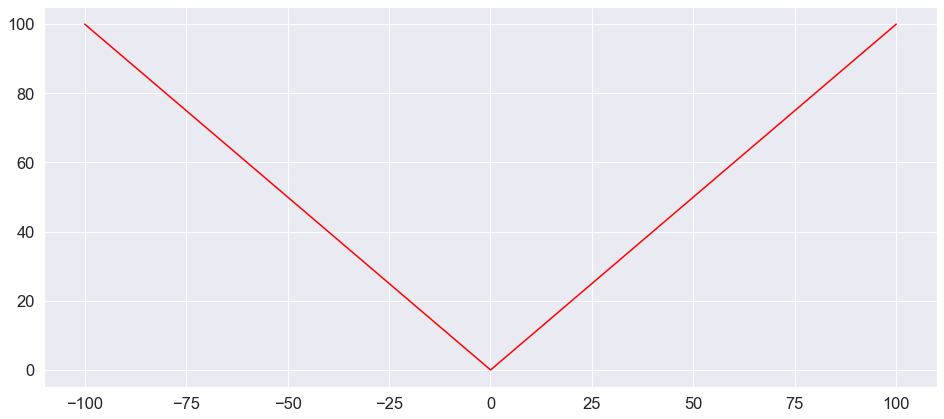

In [10]:
# Plotting
x_vals = np.arange(-100, 100, 0.01)
y_vals = np.abs(x_vals)

plt.figure(figsize=(16, 7))
plt.plot(x_vals, y_vals, "red")
plt.grid(True, which="major")

## MSE vs. MAE (L2 loss vs L1 loss)

> In machine learning we come across L1 and L2, and there are 2 aspects

    > 1) L1-loss function vs L2-loss function 
    
    > 2) L1-regularization vs L2-regularization (norms)

#### 1. Key point - L2/MSE is sensitive to outliers

- MSE is sensitive to outliers (MAE is not)
- both functions reach the minimum when the prediction is exactly equal to the true value.
- One ** big problem ** in using MAE loss (for neural nets especially) is 
    - its gradient is the same throughout, 
        - which means the gradient will be large even for small loss values. 
        - This isn’t good for learning. 
            - To fix this, we can use dynamic learning rate which decreases as we move closer to the minima. 
    - MSE behaves nicely in this case and will converge even with a fixed learning rate. 
    - The gradient of MSE loss is high for larger loss values and decreases as loss approaches 0, making it more precise at the end of training 
    
    
> L1 loss is more robust to outliers, but its derivatives are not continuous, making it inefficient to find the solution. 

> L2 loss is sensitive to outliers, but gives a more stable and closed form solution (by setting its derivative to 0.)



In [11]:
# Read Boston Housing Data

location = r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\housing.csv'

data = pd.read_csv(location)

data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
# Create a data frame with all the independent features
X = data.drop('medv', axis = 1)

# Create a target vector(vector of dependent variable, i.e. 'medv')
y = data['medv']

In [14]:
# Split data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(
                                    X, y,
                                    test_size = 0.20,
                                    random_state = 42)

### check for outliers using box plot

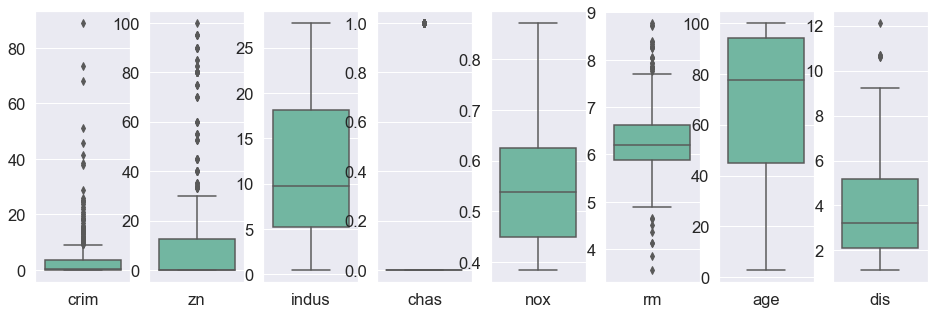

In [15]:
fig, axes = plt.subplots(ncols=8, figsize=(16, 5))

sns.boxplot(data=data[['crim']],  palette='Set2', ax=axes[0]);
sns.boxplot(data=data[['zn']]  ,   palette='Set2', ax=axes[1]);
sns.boxplot(data=data[['indus']],  palette='Set2', ax=axes[2]);
sns.boxplot(data=data[['chas']]  ,   palette='Set2', ax=axes[3]);
sns.boxplot(data=data[['nox']],  palette='Set2', ax=axes[4]);
sns.boxplot(data=data[['rm']]  ,   palette='Set2', ax=axes[5]);
sns.boxplot(data=data[['age']],  palette='Set2', ax=axes[6]);
sns.boxplot(data=data[['dis']]  ,   palette='Set2', ax=axes[7]);

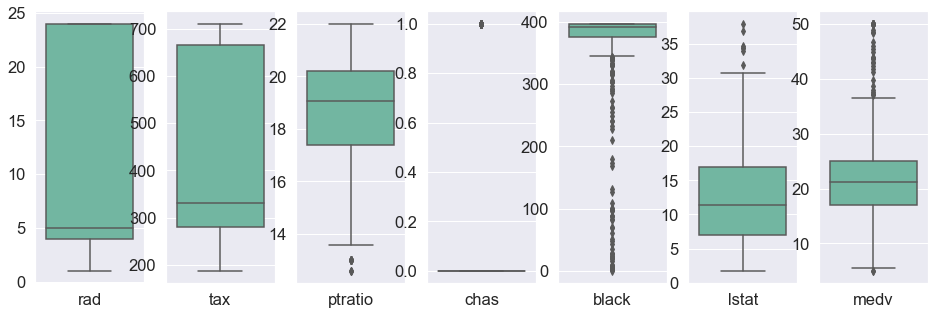

In [16]:
fig, axes = plt.subplots(ncols=7, figsize=(16, 5))

sns.boxplot(data=data[['rad']],  palette='Set2', ax=axes[0]);
sns.boxplot(data=data[['tax']]  ,   palette='Set2', ax=axes[1]);
sns.boxplot(data=data[['ptratio']],  palette='Set2', ax=axes[2]);
sns.boxplot(data=data[['chas']]  ,   palette='Set2', ax=axes[3]);
sns.boxplot(data=data[['black']],  palette='Set2', ax=axes[4]);
sns.boxplot(data=data[['lstat']]  ,   palette='Set2', ax=axes[5]);
sns.boxplot(data=data[['medv']],  palette='Set2', ax=axes[6]);


In [17]:
# function for L2 (MSE)
def rmse(predictions, targets):
    
    difference         = predictions - targets
    difference_squared = difference ** 2
        
    mse  = np.sum(difference_squared)/targets.size
    
    rmse = np.sqrt(mse)

    return rmse

In [18]:
# GradientBoostingRegressor with a L1(Least Absolute Deviations) loss function
# Set a random seed so that we can reproduce the results
np.random.seed(32767)

mod = GradientBoostingRegressor(loss='lad')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 3.372776


In [19]:
# GradientBoostingRegressor with L2(Least Square errors) loss function
mod = GradientBoostingRegressor(loss='ls')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 2.502083


As apparent from RMSE errors of L1 and L2 loss functions, Least Squares(L2) outperform L1, when there are no outliers in the data.

### add some outliers

In [20]:
# Get upper and lower bounds[min, max] of all the features
stats = data.describe()
extremes = stats.loc[['min', 'max'], :].drop('medv', axis = 1)
extremes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73
max,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97


Now, we are going to generate 5 random samples, such that their values lies in the [min, max] range of respective features.

In [21]:
# Set a random seed
np.random.seed(1234)

# Create 5 random values 
rands = np.random.rand(5, 1)
rands

# Get the 'min' and 'max' rows as numpy array
min_array = np.array(extremes.loc[['min'], :])
max_array = np.array(extremes.loc[['max'], :])

# Find the difference(range) of 'max' and 'min'
range = max_array - min_array

# Generate 5 samples with 'rands' value
outliers_X = (rands * range) + min_array
outliers_X

array([[1.70457825e+01, 1.91519450e+01, 5.68465061e+00, 1.91519450e-01,
        4.78078453e-01, 4.56054001e+00, 2.14965386e+01, 3.23572024e+00,
        5.40494736e+00, 2.87356192e+02, 1.44002828e+01, 7.62727836e+01,
        8.67066488e+00],
       [5.53552627e+01, 6.22108771e+01, 1.74311273e+01, 6.22108771e-01,
        6.87344863e-01, 6.80778568e+00, 6.33067617e+01, 7.97086794e+00,
        1.53085017e+01, 5.12984996e+02, 1.84478224e+01, 2.47035896e+02,
        2.42752219e+01],
       [3.89509044e+01, 4.37727739e+01, 1.24012127e+01, 4.37727739e-01,
        5.97735681e-01, 5.84550107e+00, 4.54033635e+01, 5.94324817e+00,
        1.10677380e+01, 4.16369335e+02, 1.67146407e+01, 1.73914067e+02,
        1.75932533e+01],
       [6.98795789e+01, 7.85358584e+01, 2.18845822e+01, 7.85358584e-01,
        7.66684272e-01, 7.65978645e+00, 7.91583185e+01, 9.76610981e+00,
        1.90632474e+01, 5.98527898e+02, 1.99823707e+01, 3.11777507e+02,
        3.01913951e+01],
       [6.94006741e+01, 7.79975808e+

In [ ]:
# We will also create some hard coded outliers
# for 'medv', i.e. our target
medv_outliers = np.array([0, 0, 600, 700, 600])

In [ ]:
# Change the type of 'chas', 'rad' and 'tax' to rounded of Integers
outliers_X[:, [3, 8, 9]] = np.int64(np.round(outliers_X[:, [3, 8, 9]]))

In [ ]:
# Finally concatenate our existing 'train_X' and
# 'train_y' with these outliers
train_X = np.append(train_X, outliers_X, axis = 0)
train_y = np.append(train_y, medv_outliers, axis = 0)

In [ ]:
# Plot a histogram of 'medv' in train_y
fig = plt.figure(figsize=(13,7))
plt.hist(train_y, bins=50, range = (-10, 800))
fig.suptitle('medv Count', fontsize = 20)
plt.xlabel('medv', fontsize = 16)
plt.ylabel('count', fontsize = 16)

there are some clear outliers at 600, 700 and even one or two ‘medv’ values are 0.

we will once again fit the GradientBoostingRegressor with L1 and L2 Loss functions to see the contrast in their performances with outliers.

In [ ]:
# GradientBoostingRegressor with L1 loss function
np.random.seed(9876)

mod = GradientBoostingRegressor(loss='lad')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

In [ ]:
# GradientBoostingRegressor with L2 loss function
mod = GradientBoostingRegressor(loss='ls')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

With outliers in the dataset, a L2(Loss function) tries to adjust the model according to these outliers on the expense of other good-samples, since the squared-error is going to be huge for these outliers(for error > 1). 

On the other hand L1(Least absolute deviation) is quite resistant to outliers.

> As a result, L2 loss function may result in huge deviations in some of the samples which results in reduced accuracy.

> So, if you can ignore the ouliers in your dataset or you need them to be there, then you should be using a ** L1 loss function **

> on the other hand if you don’t want undesired outliers in the dataset and would like to use a stable solution then first of all you should try to __remove the outliers and then use a L2 loss function__. 

Whenever in doubt, prefer L2 loss function, it works pretty well in most of the situations.

### Key point - problem in using MAE loss (for neural nets especially) is that its gradient is the same throughout

which means the gradient will be large even for small loss values. This isn’t good for learning. To fix this, we can use dynamic learning rate which decreases as we move closer to the minima. MSE behaves nicely in this case and will converge even with a fixed learning rate. The gradient of MSE loss is high for larger loss values and decreases as loss approaches 0, making it more precise at the end of training

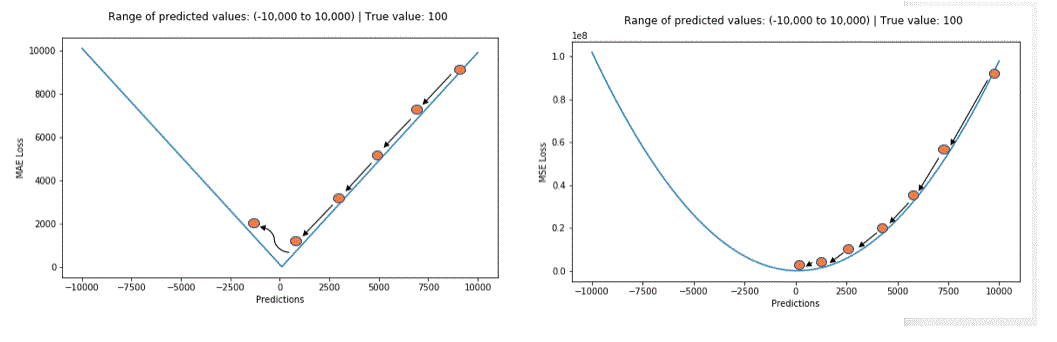

Comparison (L1 vs L2)
----------

| L1 Loss function            | L2 Loss function   | 
|------------------------     |------------------  |
| Robust to outliers          | Sensitive          | 
| Unstable solution           | Stable solution    | 
| Possibly multiple solutions | Always 1 solution  | 

Robustness, per wikipedia, is explained as:
--------

> The method of least absolute deviations finds applications in many areas, due to its __robustness__ compared to the least squares method. Least absolute deviations is robust in that it is __resistant to outliers__ in the data. This may be helpful in studies where outliers may be safely and effectively ignored. If it is important to pay attention to any and all outliers, the method of least squares is a better choice.

Stability, per wikipedia, is explained as:
---------

> The instability property of the method of least absolute deviations means that, for a small horizontal adjustment of a datum, the regression line may jump a large amount. The method has continuous solutions for some data configurations; however, by moving a datum a small amount, one could “jump past” a configuration which has multiple solutions that span a region. After passing this region of solutions, the least absolute deviations line has a slope that may differ greatly from that of the previous line. 

> In contrast, the least squares solutions is stable in that, for any small adjustment of a data point, the regression line will always move only slightly; that is, the regression parameters are continuous functions of the data.

# Loss functions for classification problems

##  we need to understand Entropy, Cross-Entropy and KL-Divergence 

-----------------------------------------------------------------------------

** Information Theory - Claude Shannon (1948) **

Every information is sent to the receiver in the form of a bit. 

Bit = UNCERTAINTY DIVIDED BY 2

Suppose we are predicting weather, possible states are: 50% chance of it being SUNNY and 50% chance that it will rain.

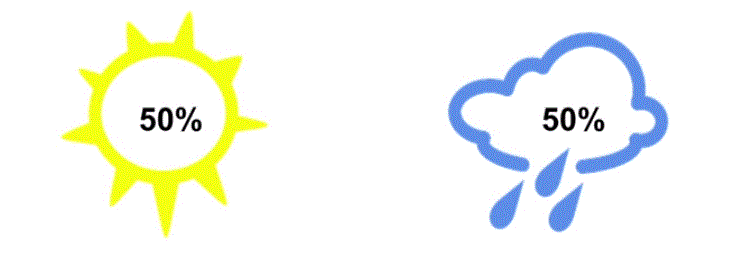

if the weather station tells you that weather is going to be RAINY tomm, then the UNCERTAINTY has been divided by factor 2. There were 2 equally likely events, but weather station reduced it to 1 (RAINY)


But now suppose that the weather has 8 possible states of equal likelihood.

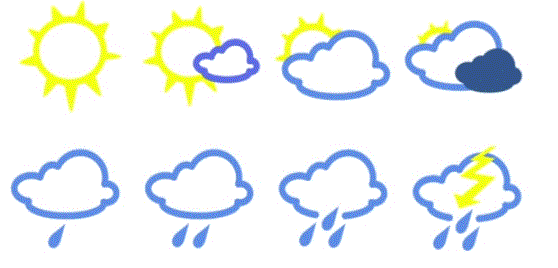

If the weather station is sending tommorrow's weather to you, then it is reducing the UNCERTAINY by a factor of 8. ($2^3 = 8 $) 

It means it will use 3 bits (using binary logarithm of UNCERTAINTY reduction factor) 
$ = log_2(8) $

But what if the weather states are not of equal likelihood. Say it is 75% SUNNY and 25% RAINY.

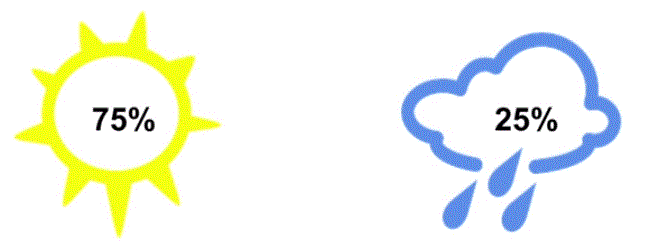

If the weather station sends you tomm's weather (RAINY) then the

UNCERTAINTY REDUCTION FACTOR = inverse of the probability, 25% = 1/(1/4) = 4

Number of bits = $log_2(4) = 2$

if the weather station sends you tomm's weather (SUNNY) then the

UNCERTAINTY REDUCTION FACTOR = inverse of the probability, 75% = 1/(3/4) = 4/3

Number of bits = $log_2(\frac{4}{3}) = .41$


So on an average how much information you will receive from the weather station?

75% x 0.41 + 25% x 2  = 0.81 bits

THIS IS THE ENTROPY FORMULA (below !!!)

** CONCLUSION **

- if you live in desert of Rajsthan, weather station sends you probably only 1 type of weather state (SUNNY), average infor received will be very less. ENTROPY WILL BE ZERO

- but if you live in an area where the weather changes frequently then ENTROPY will be high

------------------------------------------------------------------------------


__Entropy__ : It is a measure of uncertainity. A Fair coin, for instance has highest Entropy, because heads and tails (outcomes) are equally likely.Entropy allows us to search for patterns in Big data.

----------------------

If Entropy is zero, there is no unertainity, that is it is easy to make predictions

$$ \Large Entropy = -\sum_jp_j\log_2p_j$$ 

------------------------------

## Example 1

If we spin a wheel 10 times, what is the Entropy?

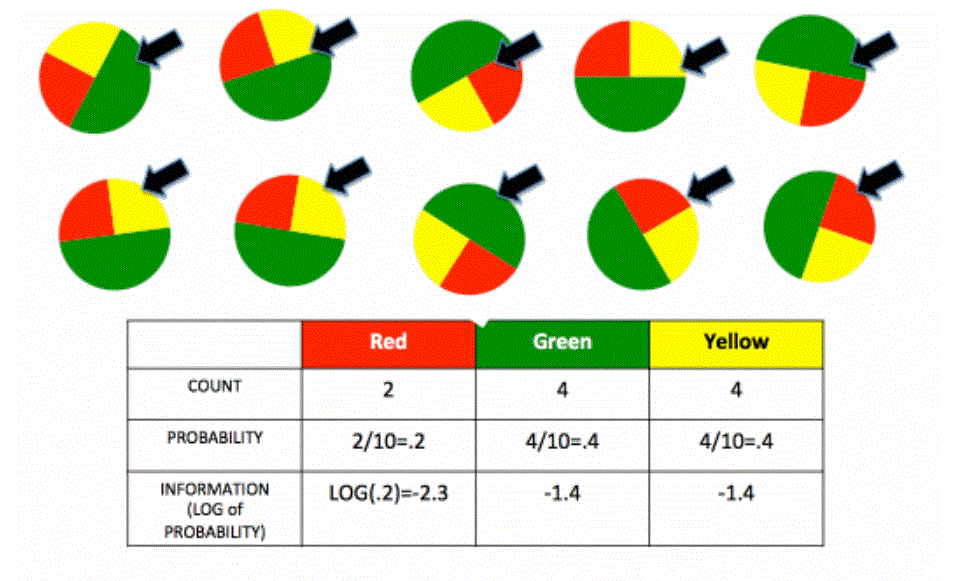

## Example 2

Which bucket has low/medium/high entropy?

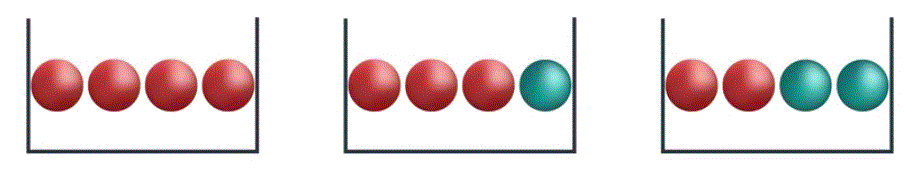


|Low Entropy ------------------------------ | Medium Entropy ---------------------------| High Entropy ----------- |
|-------------------------------------------|-------------------------------------------| -------------------------|
|High Knowledge --------------------------- | Medium Knowledge -------------------------| Low Knowledge ---------- |


Now suppose you are given a game to play:-
1. Pick a ball from the bucket. Mark the color of the ball 
2. Put it back in the bucket.
3. Pick another ball from the bucket. Mark the color.
4. Put it back in the bucket.
5. repeat it total of 4 picks

If have the same markings as the bucket, you WIN !

Which bucket is the best bucket to play the game with???

let us take this bucket....

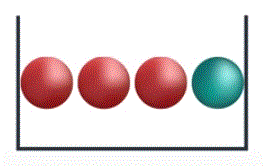

Since the balls are being replaced back in, after being picked up. So each pick is independent and the total probability that the 4 picks will result in the same arrangement is 10%

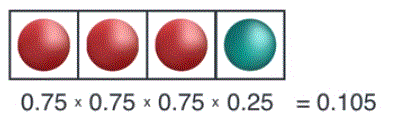

With this bucket ...

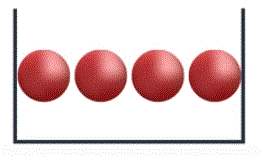

the total probability of winning is 100%

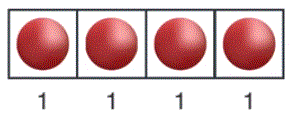

Now the 3rd bucket ...

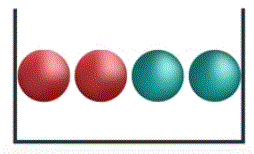

the probability of winning is just 6%

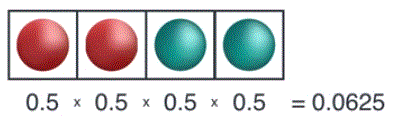


Summary 

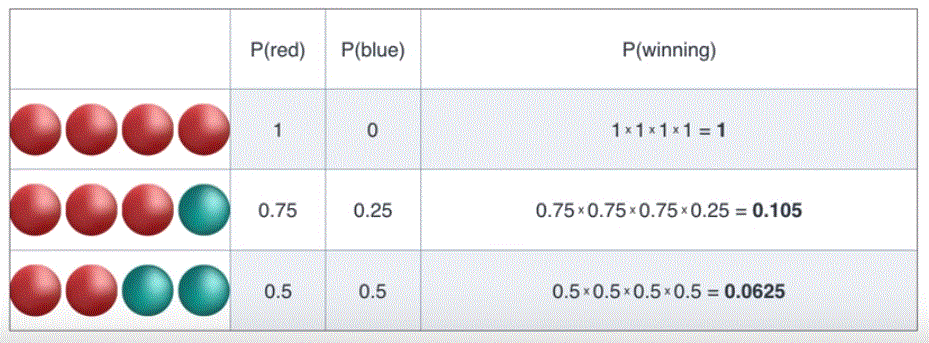

Calculating entropy ...

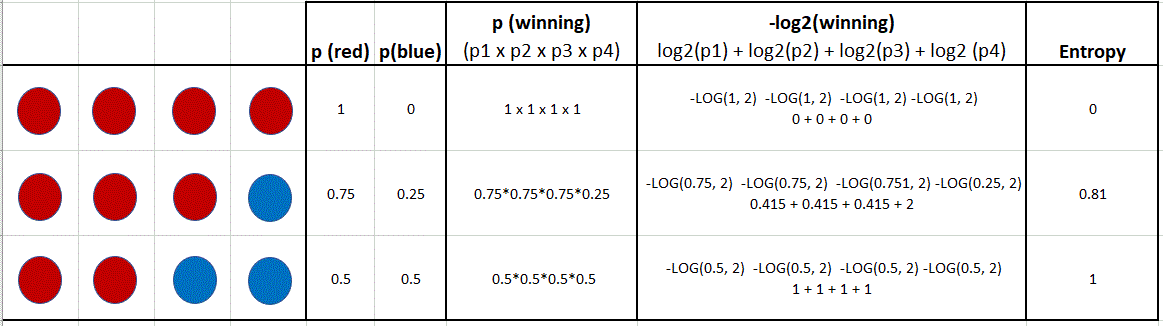

				
## Example 3
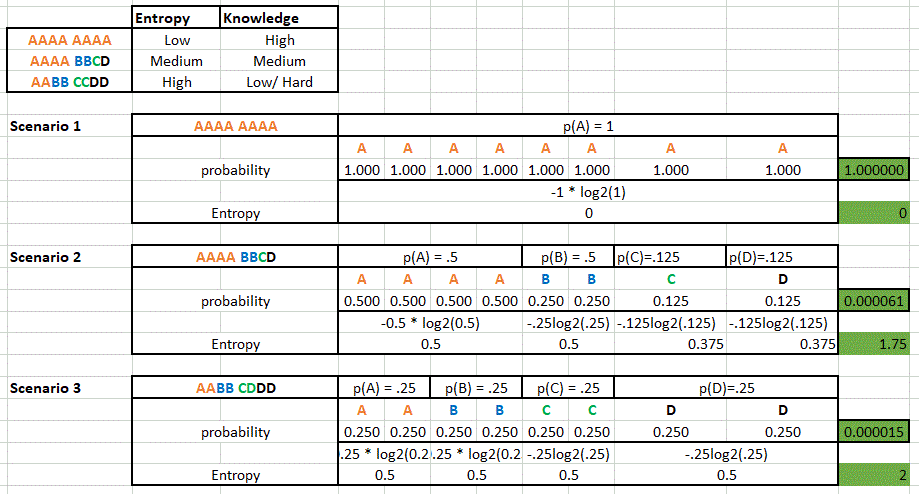





## 2. Cross-Entropy / Log Loss


In [34]:
import numpy as np

In [35]:
X = np.array([-2.2, -1.4, -0.8, 0.2, 0.4, 0.8, 1.2, 2.2, 2.9, 4.6])
y = np.array([ 0,     0,    1,   0,   1,   1,   1,   1,   1,   1])

In [74]:
X1 = np.array([-2.2, -1.4,       0.2])
X2 = np.array([            -0.8,      0.4, 0.8, 1.2, 2.2, 2.9, 4.6])

y1 = np.array([0,       0,       0])
y2 = np.array([             0,        0,   0,    0,   0,   0,   0])

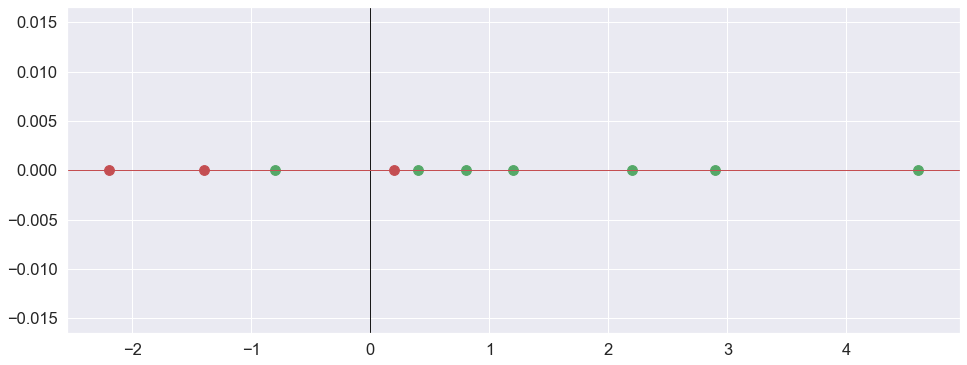

In [75]:
plt.figure(figsize=(16, 6))
plt.scatter(X1, y1, marker='o', s=96, c='r');
plt.scatter(X2, y2, marker='o', s=96, c='g');

plt.axvline(linewidth=1, color='k')
plt.axhline(linewidth=1, color='r')
plt.show()

So, our classification problem is quite straightforward: given our feature x, we need to predict its label: red or green.

Since this is a binary classification, we can also pose this problem as: “is the point green” or, even better, “what is the probability of the point being green”? 

Ideally, green points would have a probability of 1.0 (of being green), while red points would have a probability of 0.0 (of being green).

In this setting, green points belong to the positive class (YES, they are green), while red points belong to the negative class (NO, they are not green).

Let us fit a model to perform this classification, it will predict a probability of being green to each one of our points. 

Given what we know about the color of the points, how can we evaluate how good (or bad) are the predicted probabilities? 

This is the whole purpose of the ** loss function! **

It should return 
- high values for bad predictions and 
- low values for good predictions.

------------------------------


the loss function looks like:-
       
$$ J(\theta) = \dfrac{1}{m}\sum\limits_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)})) - (1 - y^{(i)})log(1 - h_\theta(x^{(i)}))] $$


----------------------------

where y is the label (1 for green points and 0 for red points) and p(y) is the predicted probability of the point being green for all N points.

Reading this formula, it tells you that, for each green point (y=1), it adds log(p(y)) to the loss, that is, the log probability of it being green. Conversely, it adds log(1-p(y)), that is, the log probability of it being red, for each red point (y=0).


## Computing the Loss — the visual way

let’s train a Logistic Regression to classify our points. The fitted regression is a sigmoid curve representing the probability of a point being green for any given x . 

In [65]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')

m = len(X)
X = X.reshape((m, 1))

logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
logreg.predict_proba(X)

array([[0.81497245, 0.18502755],
       [0.66932085, 0.33067915],
       [0.53045326, 0.46954674],
       [0.29944246, 0.70055754],
       [0.26031386, 0.73968614],
       [0.19261532, 0.80738468],
       [0.13920934, 0.86079066],
       [0.05766064, 0.94233936],
       [0.03005724, 0.96994276],
       [0.00590288, 0.99409712]])

In [82]:
y_pred = logreg.predict(X)
np.c_[y, y_pred]

array([[0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

In [66]:
# store the predicted probabilites of class 1
y_pred_proba = logreg.predict_proba(X)[:, 1]

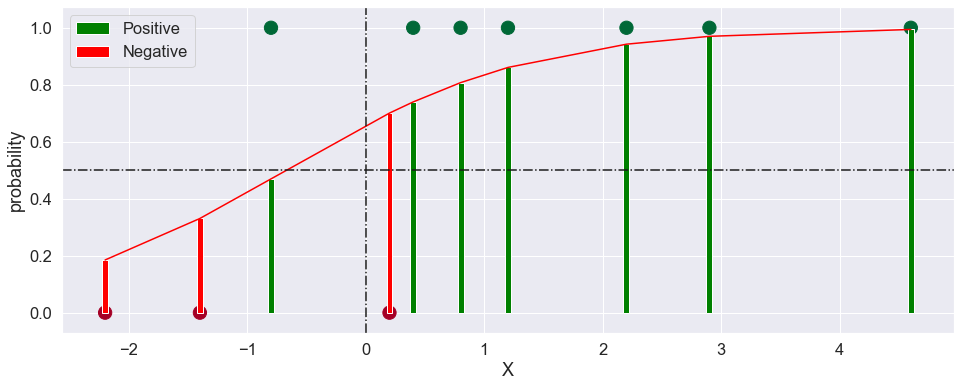

In [88]:
# plot the predicted probabilities
plt.figure(figsize=(16, 6))

plt.scatter(X, y, c=y, cmap='RdYlGn', s=176)

plt.plot(X, y_pred_proba, color='red')

plt.bar(X.ravel()[y==1],   y_pred_proba[y ==1], color='green', width=0.05, label='Positive')
plt.bar(X.ravel()[y==0],   y_pred_proba[y ==0], color='red',   width=0.05, label='Negative')

plt.axhline(y=0.5, color='k', linestyle='-.')
plt.axvline(x=0,   color='k', linestyle='-.')

plt.xlabel('X')
plt.ylabel('probability');
plt.legend();

Since we’re trying to compute a loss, we need to penalize bad predictions.

- If the probability associated with the __true class__ is 1.0, we need its loss to be 0. 

- Conversely, if that probability is low, say, 0.01, we need its loss to be HUGE!

Let’s take the (negative) log of the probabilities — these are the corresponding losses of each and every point.

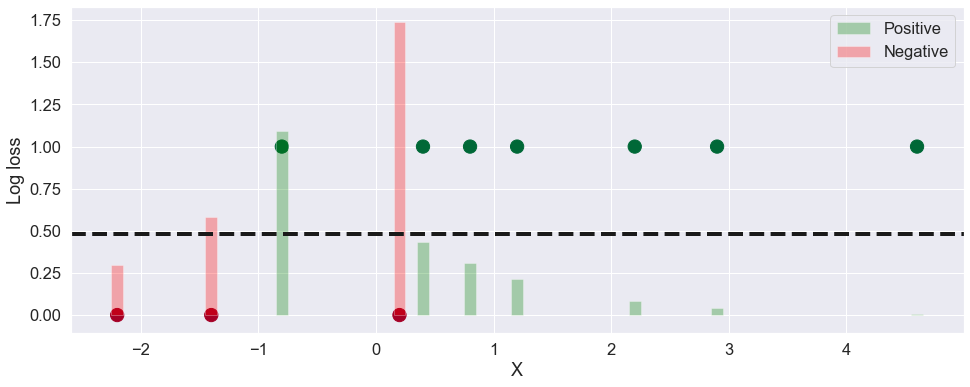

In [91]:
# plot the predicted probabilities
plt.figure(figsize=(16, 6))

plt.scatter(X, y, c=y, cmap='RdYlGn', s=176)

#plt.plot(X, y_pred_proba, color='red')

plt.bar(X.ravel()[y==1], -np.log2(  y_pred_proba[y ==1]), color='green', width=0.1, label='Positive', alpha=.3)
plt.bar(X.ravel()[y==0], -np.log2(1-y_pred_proba[y ==0]), color='red',   width=0.1, label='Negative', alpha=.3)

mean_loss = np.hstack((-np.log2(y_pred_proba[y ==1]), -np.log2(1-y_pred_proba[y ==0]))).mean()

plt.axhline(y=mean_loss, linestyle='--', linewidth= 4, color='k')
# plt.axvline(x=0,   color='c')

plt.xlabel('X')
plt.ylabel('Log loss');
plt.legend();

In [92]:
np.hstack((-np.log2(y_pred_proba[y ==1]), -np.log2(1-y_pred_proba[y ==0]))).mean()

0.4802919154993065

We have successfully computed the binary ** cross-entropy / log loss ** of this toy example. It is 0.4802919154993065!

## Log Loss and Cross Entropy

- Log Loss and Cross Entropy are Almost the Same
- Log loss is usually used when there are just 2 possible outcomes that can be either 0 or 1. 
- Cross entropy is usually used when 3 are three or more possible outcomes.

Suppose you are looking at a really weirdly shaped spinner that can come up “red”, “blue”, or “green”. 

You do some sort of physics analysis and __predict__ the probabilities of (red, blue, green) are (0.1, 0.5, 0.4). 

Then you spin the spinner many thousands of times to determine the __true/actual__ probabilities and get (0.3, 0.2, 0.5). 

To measure the accuracy of your prediction you can use cross entropy error which is best explained by example:

    CE = -( ln(0.1)(0.3) + ln(0.5)(0.2) + ln(0.4)(0.5) )
       = -( (-2.3)(0.3) + (-0.69)(0.2) + (-0.91)(0.5) )
       = -( -0.69 + -0.14 + -0.46 )
       = 1.29

> In words, __cross entropy__ is the negative sum of the products of the logs of the predicted probabilities times the actual probabilities. 

> Smaller values indicate a better prediction.


In machine learning ...

Most often predictions are discrete. 

For example, suppose you are trying to predict the political leaning (conservative, moderate, liberal) of a person based on their age, annual income, and so on. You encode (conservative, moderate, liberal) as [(1,0,0) (0,1,0) (0,0,1)]. Now suppose that for a particular age, income, etc. your prediction is (0.3, 0.6, 0.1) = moderate, because the middle value is largest.

Using cross entropy, the error is:

    CE = -( ln(0.3)(0) + ln(0.6)(1) + ln(0.1)(0) )
       = -( 0 + (-0.51)(1) + 0 )
       = 0.51
       
But in machine learning contexts, the correct probability distribution is usually a vector with one 1 value and the rest 0 values, for example, (0, 1, 0). 

So if correct = (0, 1, 0) and predicted = (0.1, 0.7, 0.2) then:

    ce = -[0 * log(0.1) + 1 * log(0.7) + 0 * log(0.2)]
       = -[0 + (1 * -0.36) + 0]
       = 0.36


The cross entropy formula takes in 2 distributions, 
- 𝑝(𝑥), the __true__ distribution 
- 𝑞(𝑥), the __estimated__ distribution, 

defined over the discrete variable 𝑥 and is given by

$$ H(p,q) = -\sum_{\forall x} p(x) \log(q(x)) $$

# Loss function for logistic regression

- Logarithmic Loss, or simply Log Loss, is a classification loss function often used as an evaluation metric
- minimising the Log Loss is the goal
- In order to calculate Log Loss the classifier must assign a probability to each class rather than simply yielding the most likely class. Mathematically Log Loss is defined as

$$ \Large - \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^M y_{ij} \log \, p_{ij} $$

where 

    - N is the number of samples or instances, 
    - M is the number of possible labels 
    - $y_{ij}$ is a binary indicator of whether or not label j is the correct classification for instance i, 
    - and $p_{ij}$ is the model probability of assigning label j to instance i. 
    
A perfect classifier would have a Log Loss of precisely zero. 

Less ideal classifiers have progressively larger values of Log Loss. If there are only two classes then the expression above simplifies to

$$ \Large - \frac{1}{N} \sum_{i=1}^N [y_{i} \log \, p_{i} + (1 - y_{i}) \log \, (1 - p_{i})] $$

OR

$$ \Large \text{Log Loss} = \sum_{(x,y)\in D} -y\log(y') - (1 - y)\log(1 - y') $$

 - y is the label. Since this is logistic regression, every value of y must either be 0 or 1.
 - $y^\prime$ is the predicted value (somewhere between 0 and 1), given the set of features.
 
Also written as ...

$$ \Large L(\theta) = \sum_i[ y_i\ln (1+e^{-\hat{y}_i}) + (1-y_i)\ln (1+e^{\hat{y}_i})] $$
 
## The equation for Log Loss is closely related to Shannon's Entropy measure from Information Theory